In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "Granule"
cell_type2 = "Bergmann"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,29.918272,-6.292420,0.115372,-54.540299,0.000000e+00,0.000000e+00
1,Nhsl1,6.331868,-6.829589,0.168826,-40.453313,0.000000e+00,0.000000e+00
2,Slc1a3,11.230687,-7.323239,0.145624,-50.288711,0.000000e+00,0.000000e+00
3,Paqr8,5.446853,-3.108203,0.085012,-36.561989,1.150029e-292,3.745646e-289
4,Map2k6,4.488594,-3.900169,0.114498,-34.063207,2.587538e-254,6.742089e-251
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


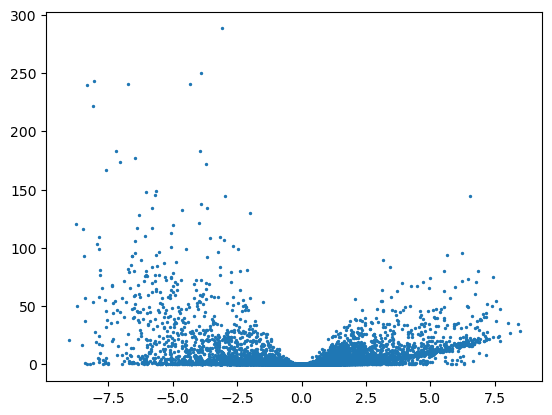

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [5]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
20,Fgf14,85.290411,6.521431,0.251925,25.886393,9.477526e-148,5.879677e-145
49,Anks1b,62.002306,6.208055,0.294163,21.104102,7.292677e-99,1.900180e-96
51,Cadps2,4.863439,5.639473,0.269592,20.918532,3.631239e-97,9.097650e-95
57,Cacna1a,22.837736,3.143677,0.153830,20.436071,7.992006e-93,1.795170e-90
62,Pclo,9.479797,3.436408,0.173713,19.782092,4.247025e-87,8.782578e-85
...,...,...,...,...,...,...,...
4130,Nek3,0.170676,2.140626,0.723555,2.958486,3.091546e-03,9.751776e-03
4133,Ccdc74a,0.271797,2.374446,0.803201,2.956228,3.114266e-03,9.814382e-03
4137,Pcgf2,0.752943,2.838936,0.960936,2.954344,3.133345e-03,9.864965e-03
4140,Slc1a6,1.375061,2.115456,0.716152,2.953921,3.137646e-03,9.871347e-03


In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,29.918272,-6.292420,0.115372,-54.540299,0.000000e+00,0.000000e+00
1,Nhsl1,6.331868,-6.829589,0.168826,-40.453313,0.000000e+00,0.000000e+00
2,Slc1a3,11.230687,-7.323239,0.145624,-50.288711,0.000000e+00,0.000000e+00
3,Paqr8,5.446853,-3.108203,0.085012,-36.561989,1.150029e-292,3.745646e-289
4,Map2k6,4.488594,-3.900169,0.114498,-34.063207,2.587538e-254,6.742089e-251
...,...,...,...,...,...,...,...
4072,Sipa1,0.894537,-2.767397,0.924637,-2.992955,2.762905e-03,8.837496e-03
4077,Tmem14a,0.508446,-2.157399,0.721310,-2.990946,2.781150e-03,8.882770e-03
4078,Gm13269,0.305783,-2.545448,0.851051,-2.990946,2.781149e-03,8.882770e-03
4126,P4ha2,0.189971,-5.020702,1.695784,-2.960696,3.069449e-03,9.689551e-03


# proceed with threshold 2 first

In [7]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Gabra6", "Gdf10"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1536,Gabra6,1.995268,7.155744,1.189147,6.017545,1.770821e-09,1.500993e-08
4714,Gdf10,0.498673,-6.181792,2.356409,-2.623395,8.705829e-03,2.405505e-02


In [8]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)] = cell_type2

In [9]:
df["category"] = category
df[df["gene"].isin(["Gabra6", "Gdf10"])]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
1536,Gabra6,1.995268,7.155744,1.189147,6.017545,1.770821e-09,1.500993e-08,Granule
4714,Gdf10,0.498673,-6.181792,2.356409,-2.623395,8.705829e-03,2.405505e-02,0.0


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


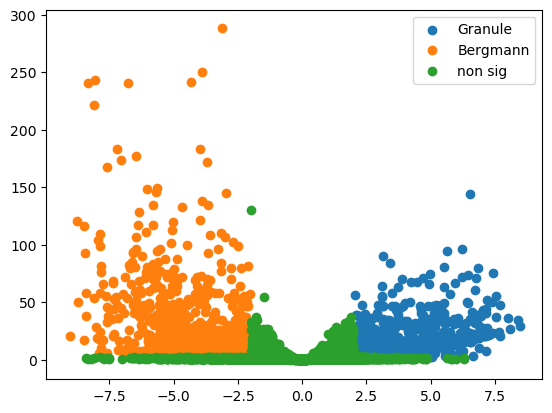

In [10]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [11]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Luzp2,29.918272,-6.292420,0.115372,-54.540299,0.000000e+00,0.000000e+00,Bergmann
1,Nhsl1,6.331868,-6.829589,0.168826,-40.453313,0.000000e+00,0.000000e+00,Bergmann
2,Slc1a3,11.230687,-7.323239,0.145624,-50.288711,0.000000e+00,0.000000e+00,Bergmann
3,Paqr8,5.446853,-3.108203,0.085012,-36.561989,1.150029e-292,3.745646e-289,Bergmann
4,Map2k6,4.488594,-3.900169,0.114498,-34.063207,2.587538e-254,6.742089e-251,Bergmann
...,...,...,...,...,...,...,...,...
4133,Ccdc74a,0.271797,2.374446,0.803201,2.956228,3.114266e-03,9.814382e-03,Granule
4137,Pcgf2,0.752943,2.838936,0.960936,2.954344,3.133345e-03,9.864965e-03,Granule
4140,Slc1a6,1.375061,2.115456,0.716152,2.953921,3.137646e-03,9.871347e-03,Granule
4142,Inha,0.321451,2.181105,0.738456,2.953603,3.140875e-03,9.876736e-03,Granule


# Map back to genome

In [12]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")
# meta["gene"] = meta["gene"].str.replace("March", "Marchf")
# meta["gene"] = meta["gene"].str.replace("Sept", "Septin")

# Mismatch between DE gene naming and annotated namming

In [14]:
DE_sig_25kb = meta.merge(DE_genes)

In [15]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [16]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [17]:
DE_sig_200kb = DE_sig_25kb.copy()

In [18]:
# Get DE norm counts
# Do not repeat count version
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')

In [19]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54772/3433087015.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")


,ID,VIIa_F002.1,VIIa_M002.1,VIIa_M006.1,VIIb_F002.1,VIIb_M002.1,VIIb_M006.1,VIIc_M002.1,VIId_M002.1,VIIa_F002.6,VIIa_M002.6,VIIa_M006.6,VIIb_F002.6,VIIb_M002.5,VIIb_M006.6,VIIc_M002.6,VIId_M002.6
0,CLUSTER,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Granule,Granule,Granule,Granule,Granule,Granule,Granule,Granule
1,Xkr4,0.446474268089923,2.19328509705236,0.670046069041676,0,0.344197962591638,0.725993300211902,0.441406961903994,0.349535768906837,7.55574393741819,15.6081641844892,17.7838761252477,12.9276361921097,12.8406454612401,15.8110321946947,14.0728376325053,12.9517072272098
2,Gm1992,0.446474268089923,0.313326442436051,0,0,0,0.181498325052975,0,0,0.930780050261661,1.75309090477958,1.64065371998299,1.41672725392983,1.59244225208293,1.41543319749047,1.90818137389903,2.25247082212345
3,Gm37381,0,0,0,0,0,0,0,0.349535768906837,0,0.0848269792635282,0,0.0590303022470762,0,0.0482534044599025,0.0265025190819309,0.0244833785013418
4,Rp1,0,0,0.167511517260419,0,0,0,0.441406961903994,0,0.109503535324901,0.0565513195090188,0.0607649525919625,0,0.151661166865041,0.0482534044599025,0.132512595409655,0.0979335140053673


In [20]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n2 + n1
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')
norm_counts.head()

,gene,Bergmann_1,Bergmann_2,Bergmann_3,Bergmann_4,Bergmann_5,Bergmann_6,Bergmann_7,Bergmann_8,Granule_1,Granule_2,Granule_3,Granule_4,Granule_5,Granule_6,Granule_7,Granule_8
0,Xkr4,0.446474,2.193285,0.670046,0.0,0.344198,0.725993,0.441407,0.349536,7.555744,15.608164,17.783876,12.927636,12.840645,15.811032,14.072838,12.951707
1,Gm1992,0.446474,0.313326,0.000000,0.0,0.000000,0.181498,0.000000,0.000000,0.930780,1.753091,1.640654,1.416727,1.592442,1.415433,1.908181,2.252471
2,Gm37381,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.349536,0.000000,0.084827,0.000000,0.059030,0.000000,0.048253,0.026503,0.024483
3,Rp1,0.000000,0.000000,0.167512,0.0,0.000000,0.000000,0.441407,0.000000,0.109504,0.056551,0.060765,0.000000,0.151661,0.048253,0.132513,0.097934
4,Sox17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020255,0.000000,0.000000,0.016084,0.026503,0.000000


In [21]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,Bergmann_1,Bergmann_2,Bergmann_3,Bergmann_4,Bergmann_5,Bergmann_6,Bergmann_7,Bergmann_8,Granule_1,Granule_2,Granule_3,Granule_4,Granule_5,Granule_6,Granule_7,Granule_8,Granule_mean,Bergmann_mean
0,Xkr4,0.446474,2.193285,0.670046,0.0,0.344198,0.725993,0.441407,0.349536,7.555744,15.608164,17.783876,12.927636,12.840645,15.811032,14.072838,12.951707,13.693955,0.646367
1,Gm1992,0.446474,0.313326,0.000000,0.0,0.000000,0.181498,0.000000,0.000000,0.930780,1.753091,1.640654,1.416727,1.592442,1.415433,1.908181,2.252471,1.613722,0.117662
2,Gm37381,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.349536,0.000000,0.084827,0.000000,0.059030,0.000000,0.048253,0.026503,0.024483,0.030387,0.043692
3,Rp1,0.000000,0.000000,0.167512,0.0,0.000000,0.000000,0.441407,0.000000,0.109504,0.056551,0.060765,0.000000,0.151661,0.048253,0.132513,0.097934,0.082148,0.076115
4,Sox17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020255,0.000000,0.000000,0.016084,0.026503,0.000000,0.007855,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [23]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,Granule_mean,Bergmann_mean
0,chr1-9,chr1,3200000,3225000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,4.274918,0.390361,10.951194,6.557720e-28,1.845226e-26,Granule,13.693955,0.646367
1,chr1-17,chr1,3400000,3425000,Xkr4,chr1-g34,34.0,chr1-g17,17,15.790706,4.274918,0.390361,10.951194,6.557720e-28,1.845226e-26,Granule,13.693955,0.646367
2,chr1-25,chr1,3600000,3625000,Xkr4,chr1-g36,36.0,chr1-g18,18,15.790706,4.274918,0.390361,10.951194,6.557720e-28,1.845226e-26,Granule,13.693955,0.646367
3,chr1-77,chr1,4900000,4925000,Rgs20,chr1-g49,49.0,chr1-g24,24,3.414300,-2.751328,0.143156,-19.219154,2.559083e-82,4.445298e-80,Bergmann,1.789808,12.453579
4,chr1-81,chr1,5000000,5025000,Rgs20,chr1-g50,50.0,chr1-g25,25,3.414300,-2.751328,0.143156,-19.219154,2.559083e-82,4.445298e-80,Bergmann,1.789808,12.453579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,19.894972,2.475061,0.428323,5.778497,7.537072e-09,6.013042e-08,Granule,2.665409,0.477110
3165,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,19.894972,2.475061,0.428323,5.778497,7.537072e-09,6.013042e-08,Granule,2.665409,0.477110
3166,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,19.894972,2.475061,0.428323,5.778497,7.537072e-09,6.013042e-08,Granule,2.665409,0.477110
3167,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,19.894972,2.475061,0.428323,5.778497,7.537072e-09,6.013042e-08,Granule,2.665409,0.477110


In [24]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [25]:
final_200kb

,200kb name,category,Granule_mean,Bergmann_mean,gene
0,chr1-g104,Bergmann,3.342018,29.155255,Paqr8
1,chr1-g106,Bergmann,0.136043,0.607526,Tmem14a
2,chr1-g111,Granule,107.981704,2.419800,Rims1
3,chr1-g112,Granule,107.981704,2.419800,Rims1
4,chr1-g113,Granule,107.981704,2.419800,Rims1
...,...,...,...,...,...
2821,chrX-g838,Granule,2.665409,0.477110,Frmpd4
2822,chrX-g839,Granule,2.665409,0.477110,Frmpd4
2823,chrX-g840,Granule,2.665409,0.477110,Frmpd4
2824,chrX-g841,Granule,2.665409,0.477110,Frmpd4


In [26]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,Granule_mean,Bergmann_mean,gene,chrom
0,chr1-g104,Bergmann,3.342018,29.155255,Paqr8,chr1
1,chr1-g106,Bergmann,0.136043,0.607526,Tmem14a,chr1
2,chr1-g111,Granule,107.981704,2.419800,Rims1,chr1
3,chr1-g112,Granule,107.981704,2.419800,Rims1,chr1
4,chr1-g113,Granule,107.981704,2.419800,Rims1,chr1
...,...,...,...,...,...,...
2821,chrX-g838,Granule,2.665409,0.477110,Frmpd4,chrX
2822,chrX-g839,Granule,2.665409,0.477110,Frmpd4,chrX
2823,chrX-g840,Granule,2.665409,0.477110,Frmpd4,chrX
2824,chrX-g841,Granule,2.665409,0.477110,Frmpd4,chrX


In [27]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,Granule_mean,Bergmann_mean,gene,chrom,chrom_id,group,log2FC_G2B
10,chr1-g16,Granule,13.693955,0.646367,Xkr4,chr1,1,16,4.405041
16,chr1-g17,Granule,13.693955,0.646367,Xkr4,chr1,1,17,4.405041
17,chr1-g18,Granule,13.693955,0.646367,Xkr4,chr1,1,18,4.405041
32,chr1-g24,Bergmann,1.789808,12.453579,Rgs20,chr1,1,24,-2.798684
33,chr1-g25,Bergmann,1.789808,12.453579,Rgs20,chr1,1,25,-2.798684
...,...,...,...,...,...,...,...,...,...
2821,chrX-g838,Granule,2.665409,0.477110,Frmpd4,chrX,20,838,2.481963
2822,chrX-g839,Granule,2.665409,0.477110,Frmpd4,chrX,20,839,2.481963
2823,chrX-g840,Granule,2.665409,0.477110,Frmpd4,chrX,20,840,2.481963
2824,chrX-g841,Granule,2.665409,0.477110,Frmpd4,chrX,20,841,2.481963


In [28]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)